# Resampling

### Libraries

In [1]:
%matplotlib notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
import os
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import Lung_Segmentation as lung

from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

### Patients

In [2]:
# Some constants 
INPUT_FOLDER = 'E:/Prac_Clinicas/Images/LIDC-IDRI/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

### Load Images

In [3]:
first_patient = lung.load_scan(INPUT_FOLDER + patients[0])
first_patient_pixels = lung.get_pixels_hu(first_patient)

### Original Images

<IPython.core.display.Javascript object>


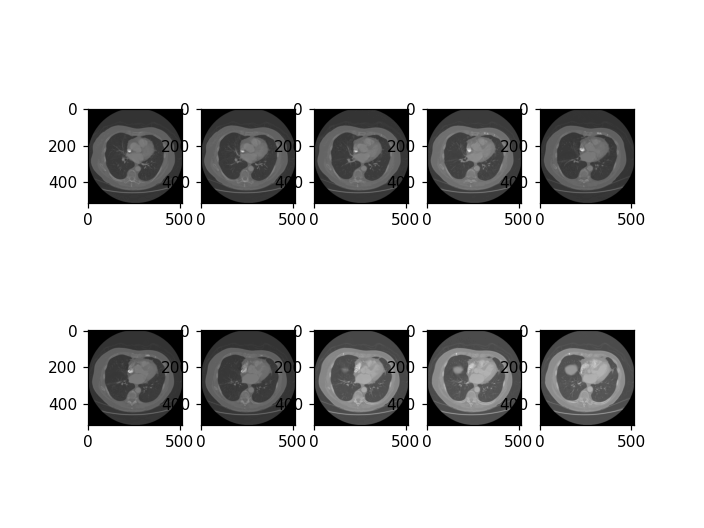

In [4]:
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1), plt.imshow(first_patient_pixels[60+i], 'gray')

### Segmentation

In [5]:
segmented_patient = []
for slice in first_patient_pixels:
    segmented = lung.seperate_lungs(slice)
    segmented_patient.append(segmented)
    
segmented_patient = np.array(segmented_patient)

<IPython.core.display.Javascript object>


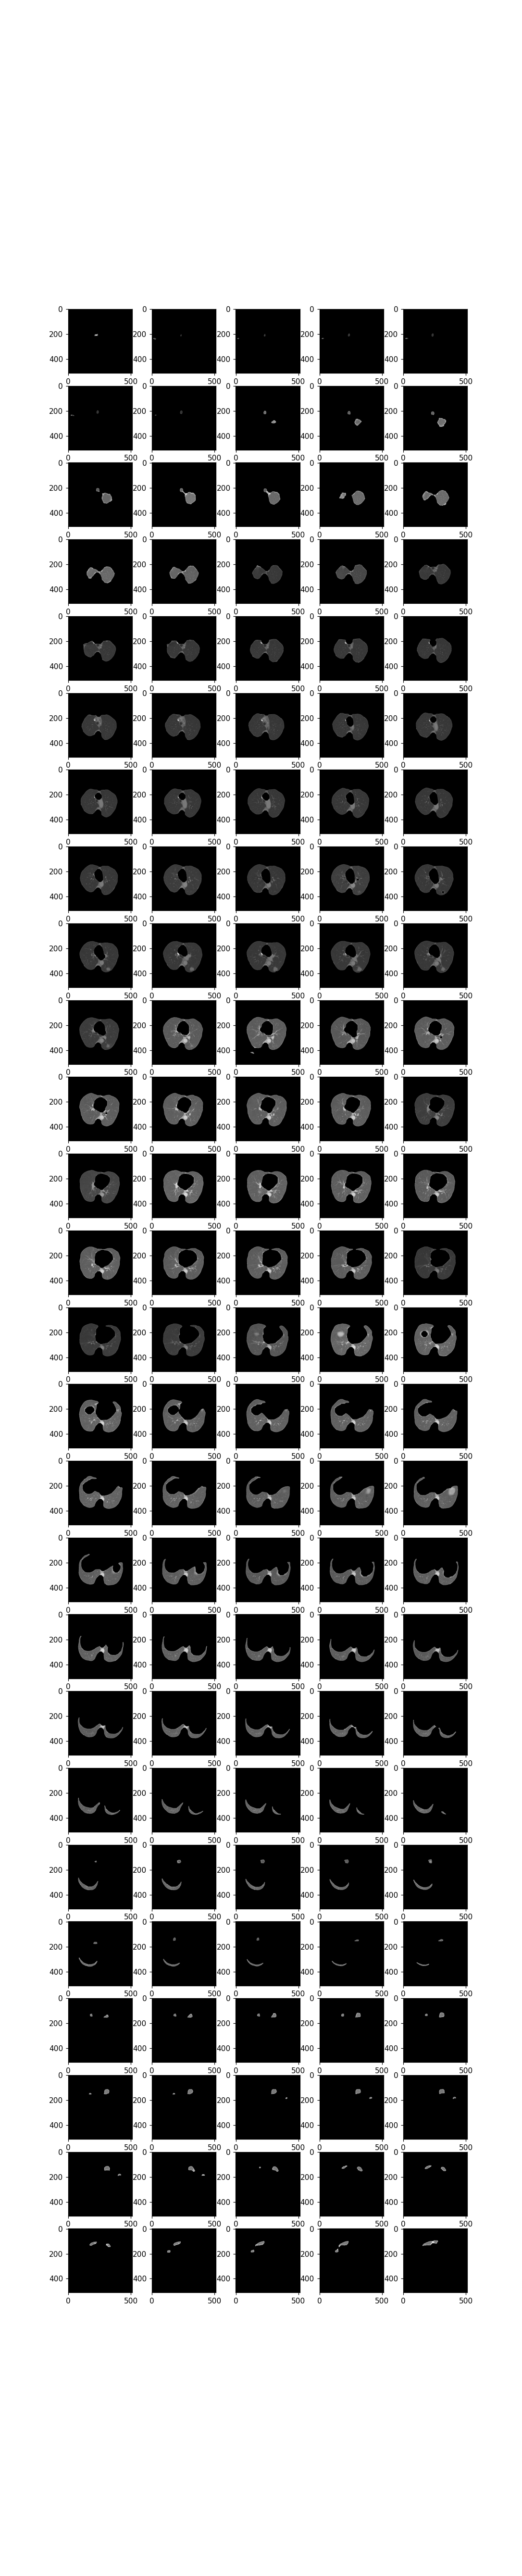

In [6]:
plt.figure()
for i in range(130):
    plt.subplot(26, 5, i+1), plt.imshow(segmented_patient[i], 'gray')

### Resampling

In [8]:
first_patient_pixels.shape

(133, 512, 512)

In [9]:
pix_resampled, spacing = lung.resample(segmented_patient, first_patient, [10,6,6])

In [10]:
pix_resampled.shape

(33, 60, 60)

### Plot Results

<IPython.core.display.Javascript object>


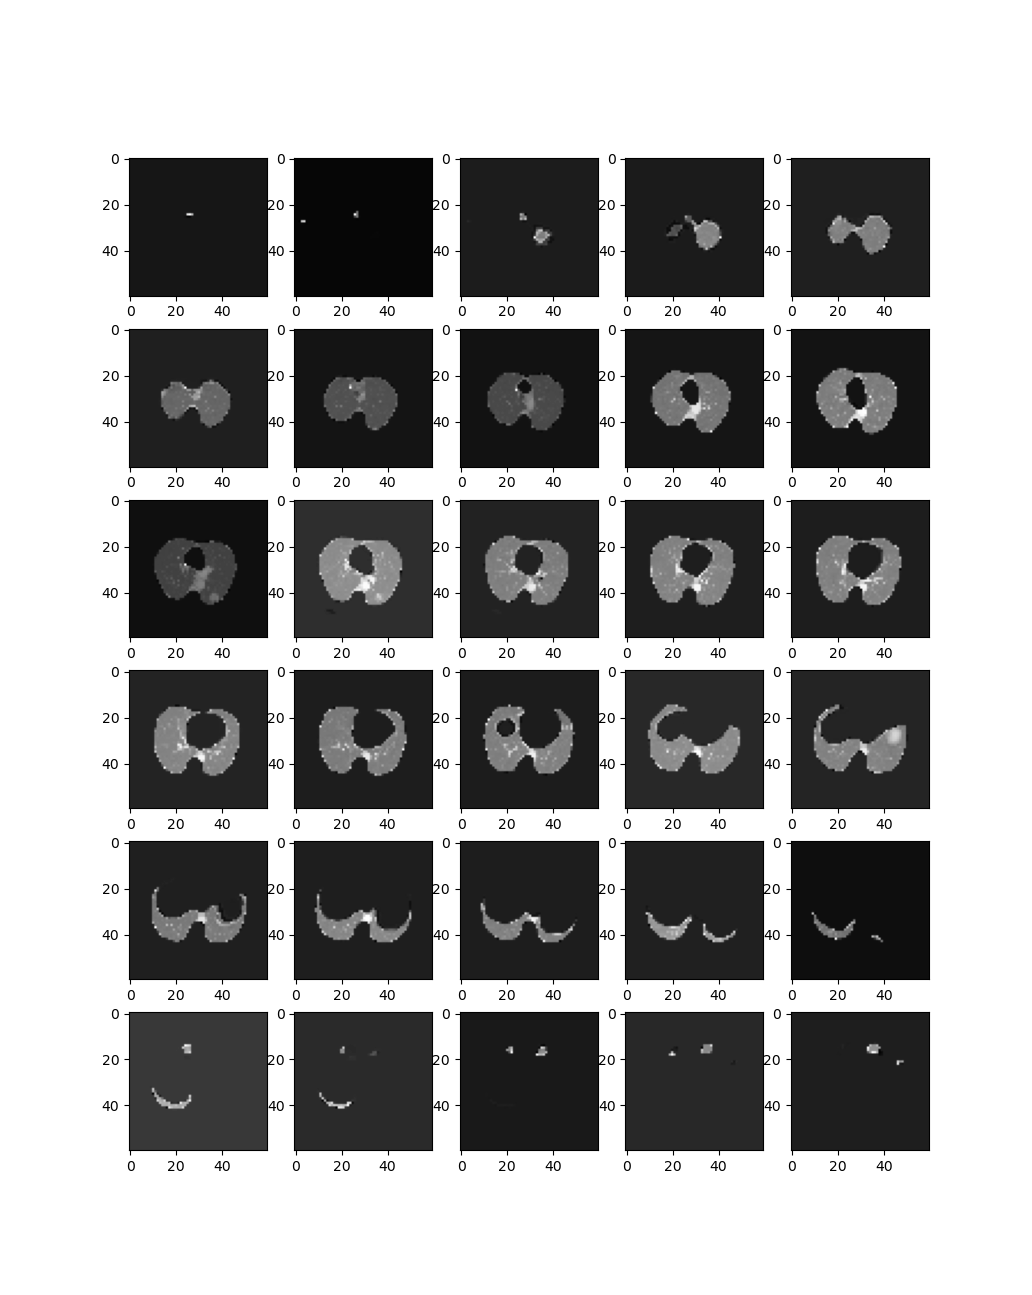

In [11]:
plt.figure()
for i in range(30):
    plt.subplot(6, 5, i+1), plt.imshow(pix_resampled[i], 'gray')